In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,LSTM

Using TensorFlow backend.


In [2]:

data2=pd.read_csv('train_1.csv',encoding='latin-1')
data2.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [3]:
data2.size

299967

In [4]:
import re
data2['SentimentText'].head()
data2['SentimentText']=data2['SentimentText'].apply(lambda x:str(x).lower())
data2['SentimentText']=data2['SentimentText'].apply(lambda x:re.sub('[^a-zA-z0-9\s]','',x))
indexs=data2[data2["SentimentText"]=="not available"].index
data2.drop(indexs , inplace=True)
data2.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my apl friend
1,2,0,i missed the new moon trailer
2,3,1,omg its already 730 o
3,4,0,omgaga im sooo im gunna cry ive be...
4,5,0,i think mi bf is cheating on me ...


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D ,Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
max_fature=2000
tokenizer=Tokenizer(num_words=max_fature,split=' ')
#print(tokenizer)
Y=tokenizer.fit_on_texts(data2['SentimentText'].values)
#print(Y)
X = tokenizer.texts_to_sequences(data2['SentimentText'].values)
X = pad_sequences(X)

In [6]:
embed_dim = 128
lstm_out = 196

model = Sequential()
Z=model.add(Embedding(max_fature, embed_dim,input_length = X.shape[1]))
'''
    this layer creates an embedding matrix
'''

model.output_shape

(None, 84, 128)

In [7]:
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
model.add(LSTM(lstm_out,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'mean_squared_error', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 84, 128)           256000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 84, 196)           254800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 196)               308112    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 394       
Total params: 819,306
Trainable params: 819,306
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
 model.save('model_3.h5')

In [9]:
Y=pd.get_dummies(data2['Sentiment'].values)
Y.head()

,0,1
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train)
print(X_train.shape)

[[  0   0   0 ... 124  41   6]
 [  0   0   0 ... 808   4 512]
 [  0   0   0 ...  43 984 327]
 ...
 [  0   0   0 ... 377   8 509]
 [  0   0   0 ...  41   6 285]
 [  0   0   0 ...   3 382  45]]
(79991, 84)


In [13]:
history = model.fit(X_train, Y_train, epochs=7,batch_size=128, validation_split=0.2, shuffle=True)
model.save('model_3.h5')

Train on 63992 samples, validate on 15999 samples
Epoch 1/7
63992/63992 [==============================] - 1556s 24ms/step - loss: 0.1790 - acc: 0.7294 - val_loss: 0.1658 - val_acc: 0.7553
Epoch 2/7
63992/63992 [==============================] - 1533s 24ms/step - loss: 0.1582 - acc: 0.7703 - val_loss: 0.1624 - val_acc: 0.7603
Epoch 3/7
63992/63992 [==============================] - 1536s 24ms/step - loss: 0.1516 - acc: 0.7805 - val_loss: 0.1616 - val_acc: 0.7620
Epoch 4/7
63992/63992 [==============================] - 1541s 24ms/step - loss: 0.1463 - acc: 0.7907 - val_loss: 0.1583 - val_acc: 0.7686
Epoch 5/7
63992/63992 [==============================] - 1534s 24ms/step - loss: 0.1414 - acc: 0.8007 - val_loss: 0.1601 - val_acc: 0.7687
Epoch 6/7
63992/63992 [==============================] - 1539s 24ms/step - loss: 0.1372 - acc: 0.8063 - val_loss: 0.1600 - val_acc: 0.7692
Epoch 7/7
63992/63992 [==============================] - 1542s 24ms/step - loss: 0.1333 - acc: 0.8150 - val_loss: 0.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


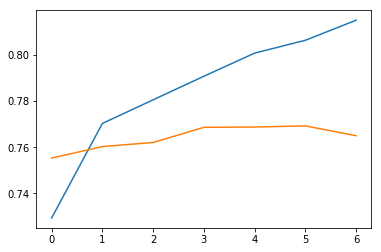

In [16]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [18]:
history = model.fit(X_train, Y_train, epochs=3,batch_size=128, validation_split=0.2, shuffle=True)
model.save('model_3.h5')

Train on 63992 samples, validate on 15999 samples
Epoch 1/3
63992/63992 [==============================] - 1938s 30ms/step - loss: 0.1297 - acc: 0.8198 - val_loss: 0.1627 - val_acc: 0.7623
Epoch 2/3
63992/63992 [==============================] - 1836s 29ms/step - loss: 0.1255 - acc: 0.8275 - val_loss: 0.1660 - val_acc: 0.7615
Epoch 3/3
63992/63992 [==============================] - 1575s 25ms/step - loss: 0.1228 - acc: 0.8324 - val_loss: 0.1700 - val_acc: 0.7594


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


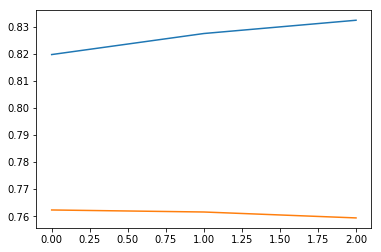

In [20]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

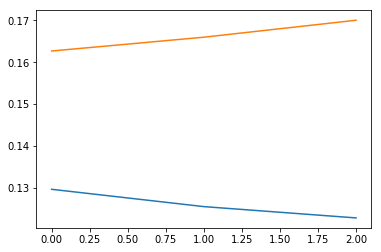

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [31]:
twt = ['I love the way you lied']

#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=84, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1  43   2 131   4]]
positive
